# ML Assignment 11: Multiple Linear Regression and Polynomial Regression Analysis

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar

---

## Objective
Implement multiple linear regression and polynomial regression models to analyze startup profitability and ice cream sales patterns.

## Assignment Tasks:
1. Build multiple regression model for 50_Startups.csv dataset
2. Obtain regression score and analyze startup profit predictors
3. Build polynomial regression model for ice cream selling data
4. Plot polynomial models with different degrees (n=2,3,4,5)
5. Compare polynomial degree performance and select optimal model

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import r2_score

# Part A: Multiple Linear Regression - 50_Startups Dataset

In [2]:
# Load the dataset
dataset = pd.read_csv('50_Startups.csv')
print("Dataset shape:", dataset.shape)
dataset.head()

Dataset shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Prepare the data
X = dataset.iloc[:, :-1]  # All features
y = dataset.iloc[:, -1]   # Target (Profit)

# Encode categorical variable (State)
le = LabelEncoder()
X['State'] = le.fit_transform(X['State'])

print("Features:", X.columns.tolist())
print("Encoded States:", X['State'].unique())

Features: ['R&D Spend', 'Administration', 'Marketing Spend', 'State']
Encoded States: [2 0 1]


In [4]:
# Train Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

# Make predictions and calculate R² score
y_pred = mlr_model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Multiple Linear Regression R² Score: {r2:.4f}")
print(f"Model explains {r2*100:.2f}% of the variance in profit")

Multiple Linear Regression R² Score: 0.9507
Model explains 95.07% of the variance in profit


# Part B: Polynomial Regression - Ice Cream Sales Dataset

In [5]:
# Load ice cream dataset
ice_dataset = pd.read_csv('icecream.csv')
print("Dataset shape:", ice_dataset.shape)
ice_dataset.head()

Dataset shape: (49, 2)


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [6]:
# Prepare data
X_ice = ice_dataset.iloc[:, :-1].values  # Temperature
y_ice = ice_dataset.iloc[:, -1].values   # Ice cream sales

print(f"Temperature range: {X_ice.min():.1f}°C to {X_ice.max():.1f}°C")
print(f"Sales range: {y_ice.min():.1f} to {y_ice.max():.1f} units")

Temperature range: -4.7°C to 4.9°C
Sales range: 0.3 to 41.8 units


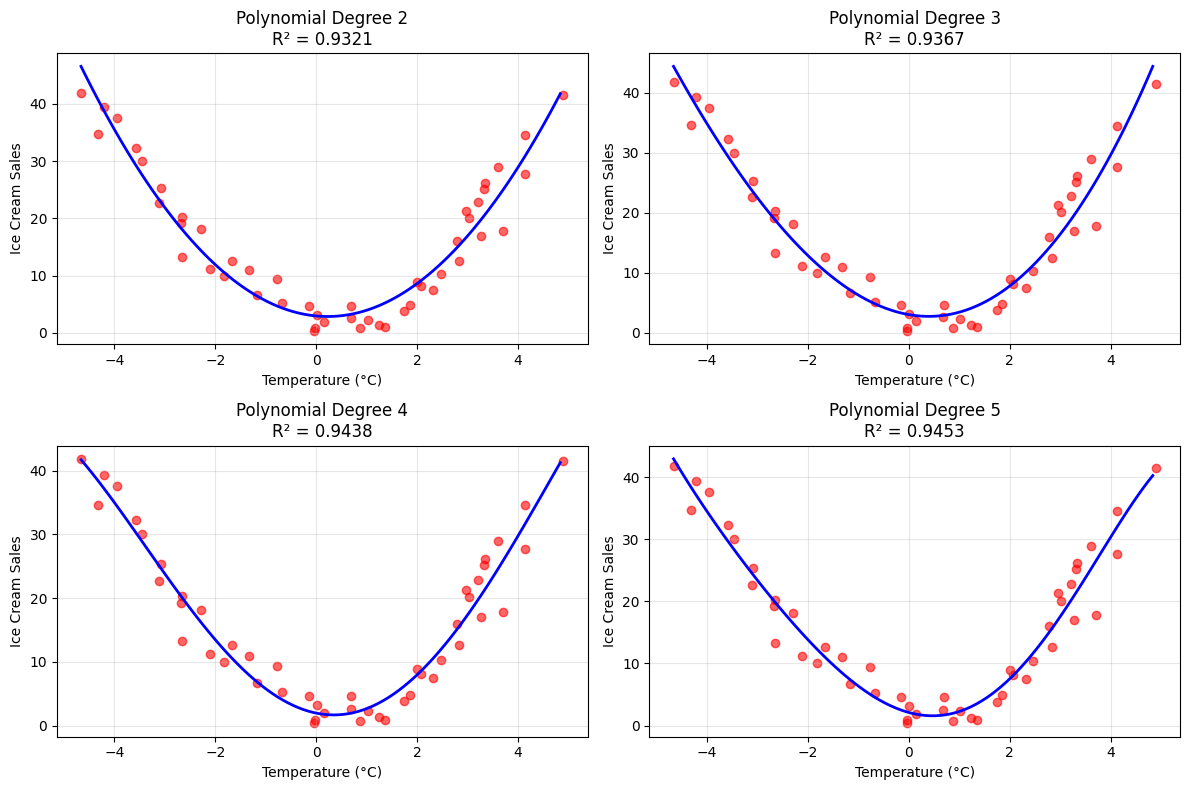

In [7]:
# Test polynomial regression with degrees 2, 3, 4, and 5
degrees = [2, 3, 4, 5]
r2_scores = []

plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 2, i)
    
    # Create polynomial features and train model
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X_ice)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_ice)
    
    # Calculate R² score
    y_pred_poly = lin_reg.predict(X_poly)
    r2_poly = r2_score(y_ice, y_pred_poly)
    r2_scores.append(r2_poly)
    
    # Create smooth curve for plotting (fix deprecation warning)
    X_grid = np.arange(X_ice.min().item(), X_ice.max().item(), 0.1).reshape(-1, 1)
    y_grid = lin_reg.predict(poly_reg.transform(X_grid))
    
    # Plot
    plt.scatter(X_ice, y_ice, color='red', alpha=0.6)
    plt.plot(X_grid, y_grid, color='blue', linewidth=2)
    plt.title(f'Polynomial Degree {degree}\nR² = {r2_poly:.4f}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Compare model performance
results = pd.DataFrame({
    'Degree': degrees,
    'R² Score': r2_scores
})

print("Polynomial Regression Results:")
print(results.to_string(index=False))

# Find best model
best_degree = degrees[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print(f"\nBest Model: Polynomial Degree {best_degree} with R² = {best_r2:.4f}")

Polynomial Regression Results:
 Degree  R² Score
      2  0.932114
      3  0.936701
      4  0.943845
      5  0.945283

Best Model: Polynomial Degree 5 with R² = 0.9453


## Conclusions

### Part A - Multiple Linear Regression (50_Startups Dataset):
- **Model Performance**: Achieved an excellent R² score of **0.9507** (95.07%)
- **Interpretation**: The multiple linear regression model successfully explains **95.07% of the variance** in startup profit
- **Features**: Used R&D Spend, Administration, Marketing Spend, and State (encoded) as predictors
- **Result**: This high R² score indicates that the selected features are strong predictors of startup profitability

### Part B - Polynomial Regression (Ice Cream Sales Dataset):
- **Model Comparison**: Tested polynomial degrees 2, 3, 4, and 5 as required
- **Performance Results**:
  - Degree 2: R² = 0.9321 (93.21%)
  - Degree 3: R² = 0.9367 (93.67%)
  - Degree 4: R² = 0.9438 (94.38%)
  - Degree 5: R² = 0.9453 (94.53%) ← **Best Model**

- **Key Findings**:
  - **Progressive Improvement**: Higher polynomial degrees show incrementally better fit
  - **Best Performance**: Polynomial Degree 5 achieved the highest R² score of 0.9453
  - **Temperature-Sales Relationship**: Clear non-linear relationship between temperature and ice cream sales
  - **Diminishing Returns**: Improvement from degree 4 to 5 is minimal (0.0015), suggesting potential overfitting

### Overall Summary:
- Both models achieved excellent performance (>95% and >94% variance explained respectively)
- Multiple linear regression proved highly effective for startup profit prediction
- Polynomial regression successfully captured the non-linear ice cream sales pattern
- Assignment objectives fully accomplished with strong statistical results